In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from sklearn.model_selection import train_test_split

Sequential = keras.models.Sequential
Dense = keras.layers.Dense

In [2]:
def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label, x_len):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(x_len))
    plt.yticks([])
    thisplot = plt.bar(range(x_len), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [3]:
X = np.load('../input/binary_alpha_digits_images.npy')
Y = np.load('../input/binary_alpha_digits_labels.npy')

In [4]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [5]:
X.shape, Y.shape

((1404, 20, 16), (1404,))

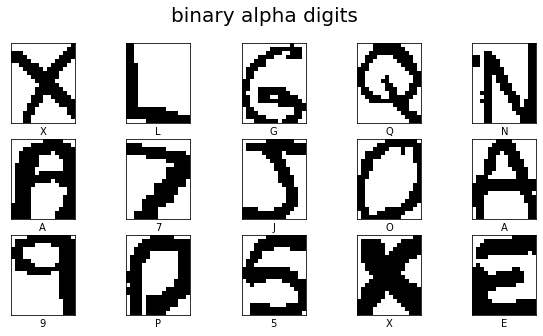

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[Y[n]])
    n += 1

In [7]:
# Разделение данных на тренировочные и тестовые
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(len(classes))
])

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 128)               41088     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 36)                4644      
                                                                 
Total params: 46,244
Trainable params: 45,988
Non-trainable params: 256
__________________________________________________

In [11]:
hstr = model.fit(train_images, train_labels, epochs=3, verbose=2)
print(hstr.params)

Epoch 1/3
30/30 - 0s - loss: 3.2887 - accuracy: 0.1649 - 473ms/epoch - 16ms/step
Epoch 2/3
30/30 - 0s - loss: 1.9296 - accuracy: 0.4979 - 41ms/epoch - 1ms/step
Epoch 3/3
30/30 - 0s - loss: 1.3991 - accuracy: 0.6436 - 49ms/epoch - 2ms/step
{'verbose': 2, 'epochs': 3, 'steps': 30}


In [12]:
model.predict(test_images)
model.evaluate(test_images, test_labels)

15/15 [==============================] - 0s 1ms/step - loss: 2.0752 - accuracy: 0.4978


[2.0752129554748535, 0.4978448152542114]

In [13]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

15/15 [==============================] - 0s 929us/step


In [14]:
# Evaluate the model.
model.evaluate(test_images, test_labels)

15/15 [==============================] - 0s 857us/step - loss: 2.0752 - accuracy: 0.4978


[2.0752129554748535, 0.4978448152542114]

In [15]:
classes_len = len(classes)

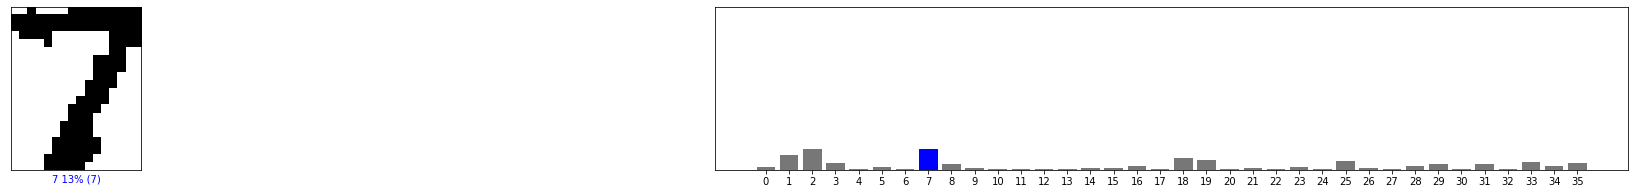

In [16]:
i = 12
plt.figure(figsize=(36,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images, classes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels, classes_len)
plt.show()

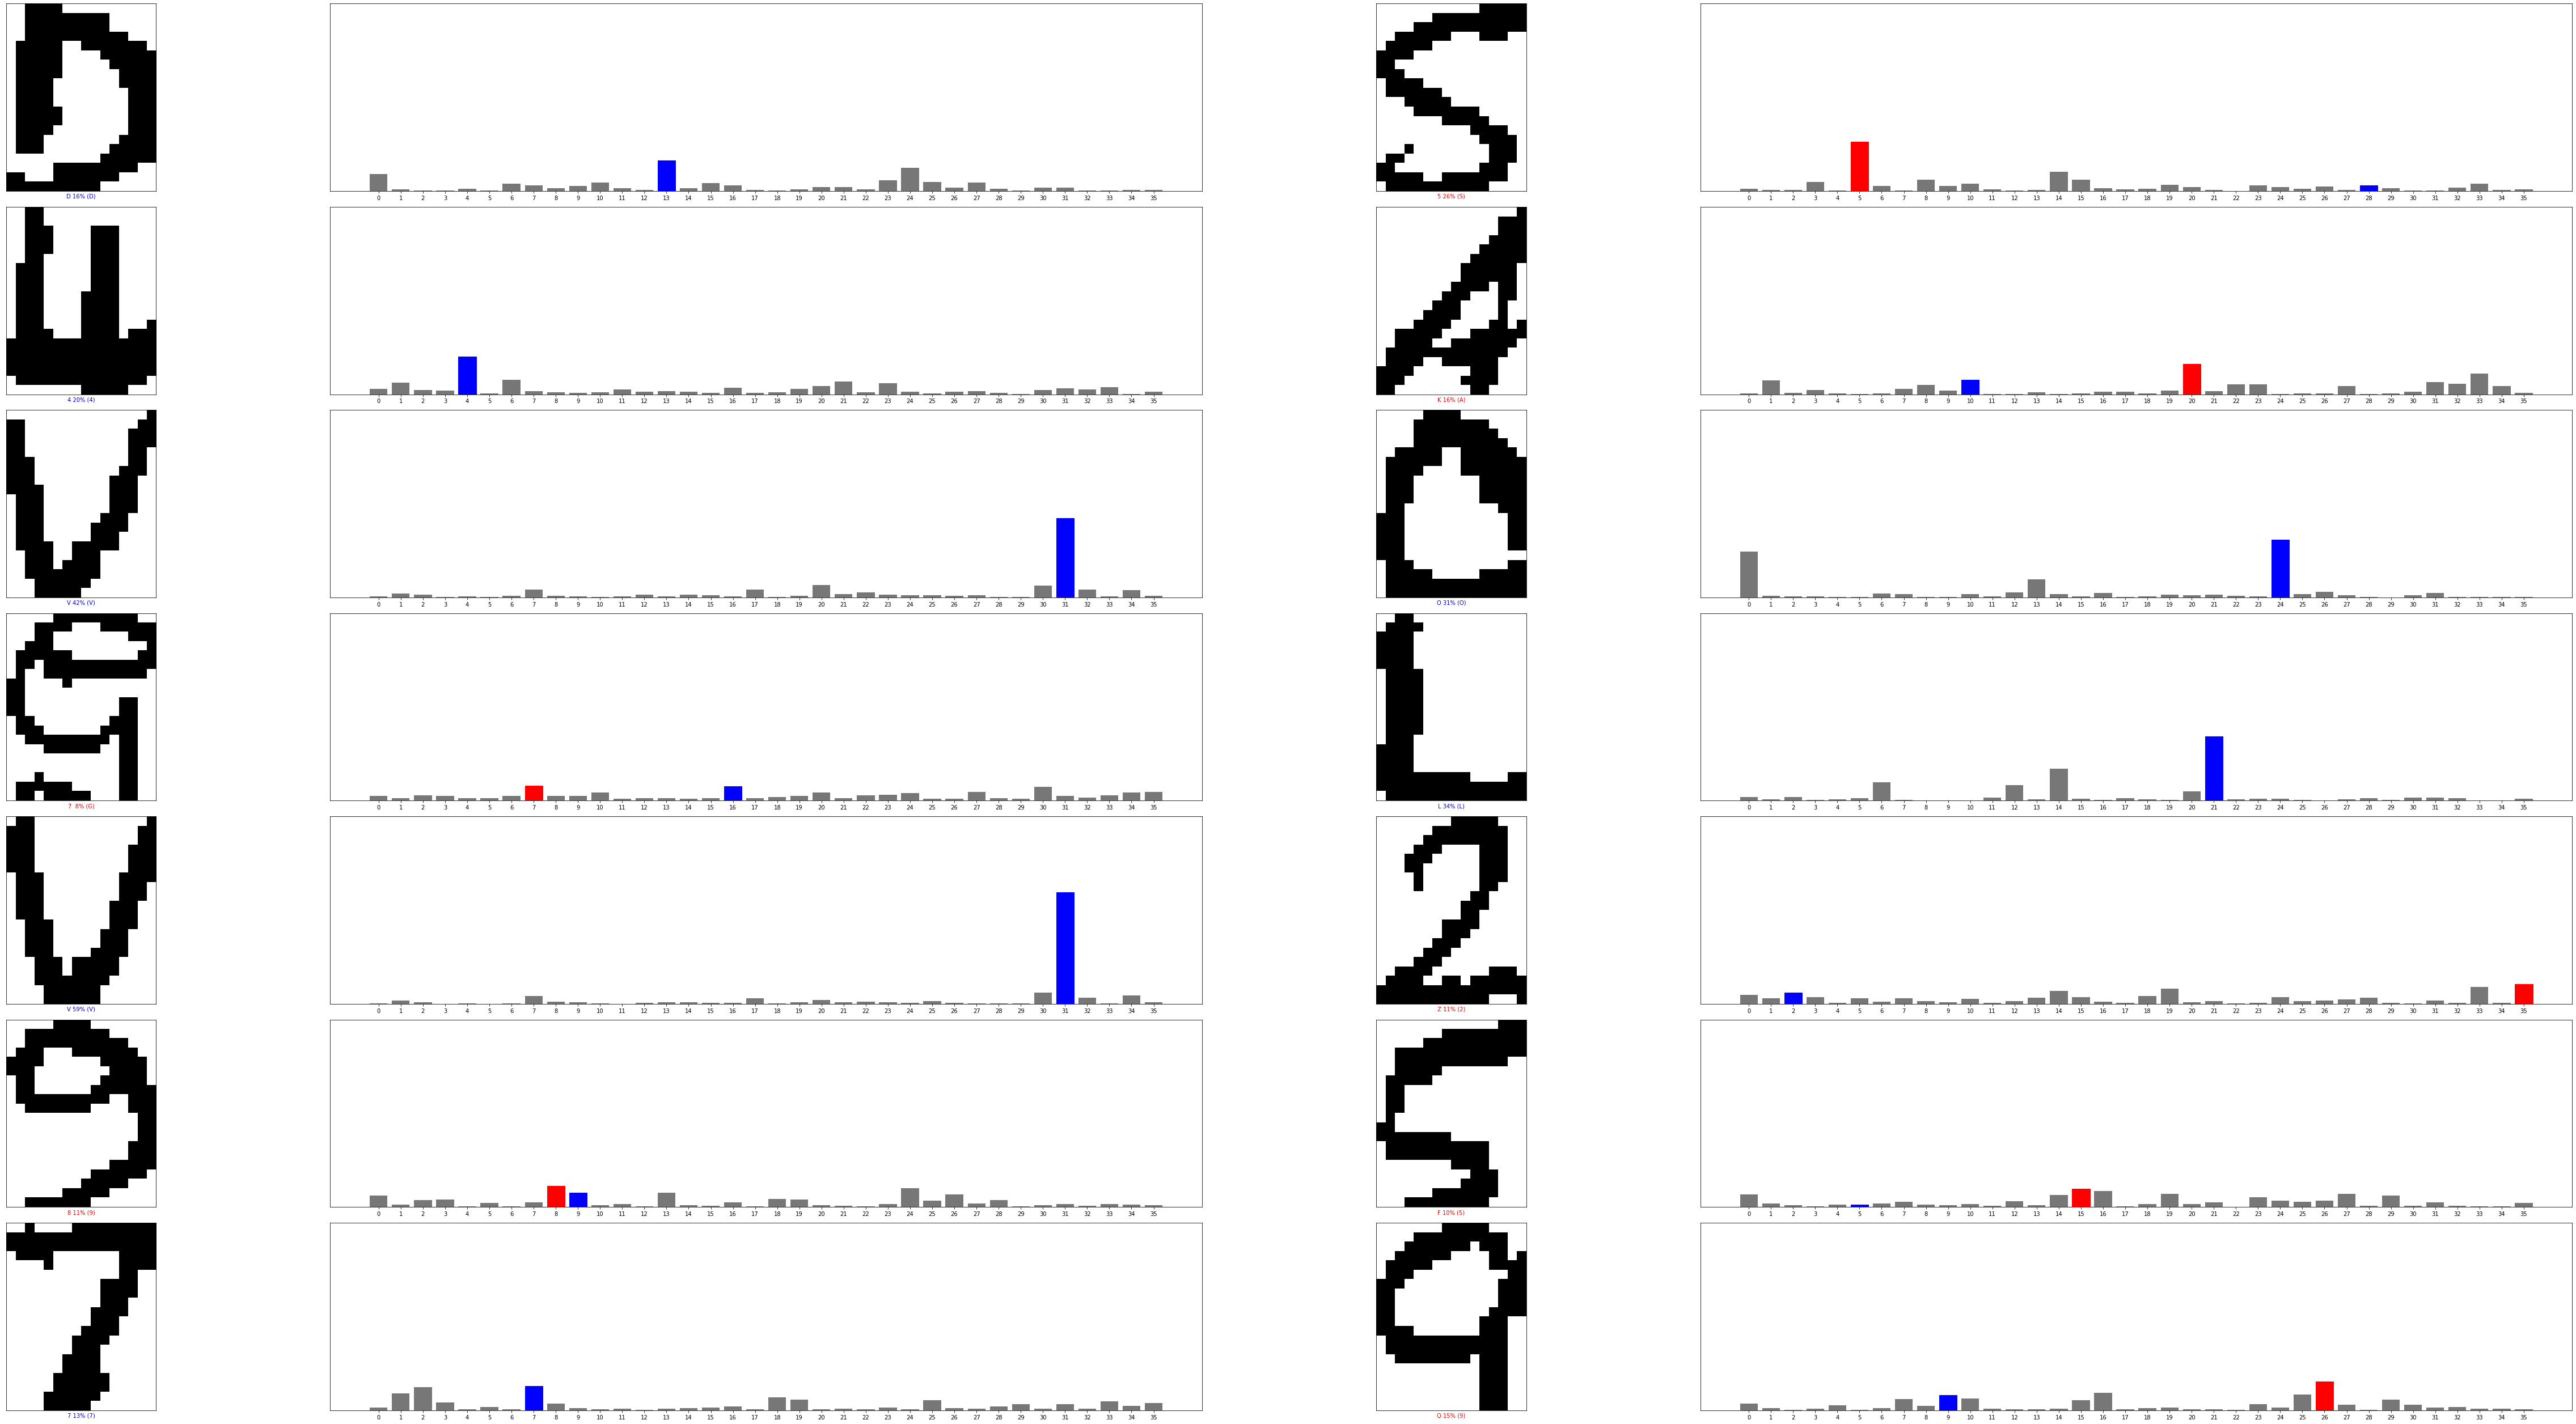

In [18]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(36*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images, classes)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels, classes_len)
plt.tight_layout()
plt.show()


### Вывод
Хватило простой модели для хорошего результата
